Question 1. Unzip the dataset using appropriate functions and rename it to "Netflix_shows_movies."

In [10]:
# File netflix_data already unzipped and we renamed it manually as "Netflix_shows_movies.csv"

Question 2. Data Cleaning: Address missing values in the dataset.

In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./Netflix_shows_movies.csv')

# Display missing values
print("Missing values per column:")
print(data.isnull().sum())

# Handle missing values by dropping rows with missing data
cleaned_data = data.dropna()

# Save the cleaned dataset
cleaned_data.to_csv('./Netflix_shows_movies_cleaned.csv', index=False)

print("Cleaned data saved successfully as 'Netflix_shows_movies_cleaned.csv'")


Missing values per column:
show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64
Cleaned data saved successfully as 'Netflix_shows_movies_cleaned.csv'


In [ ]:
Question 3: Data Exploration: Perform various data exploration tasks, including describing the data and conducting statistical analysis.

In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./Netflix_shows_movies_cleaned.csv')

# Display basic dataset information
print("Dataset Overview:")
print(f"Shape: {data.shape}")  # Show number of rows and columns
print("\nBasic Information:")
data.info()

# Display statistical summary for numerical columns
print("\nStatistical Summary (Numerical Columns):")
print(data.describe())

# Display unique values and frequency distribution for categorical columns
print("\nCategorical Columns Analysis:")
categorical_columns = data.select_dtypes(include='object').columns
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {data[col].nunique()}")
    print(data[col].value_counts())

# Display the correlation matrix for numerical columns only
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns  # Select only numeric columns
if not numerical_columns.empty:
    print("\nCorrelation Matrix (Numerical Columns):")
    print(data[numerical_columns].corr())
else:
    print("\nNo numerical columns available for correlation matrix.")


Dataset Overview:
Shape: (3774, 12)

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       3774 non-null   int64 
 1   type          3774 non-null   object
 2   title         3774 non-null   object
 3   director      3774 non-null   object
 4   cast          3774 non-null   object
 5   country       3774 non-null   object
 6   date_added    3774 non-null   object
 7   release_year  3774 non-null   int64 
 8   rating        3774 non-null   object
 9   duration      3774 non-null   object
 10  listed_in     3774 non-null   object
 11  description   3774 non-null   object
dtypes: int64(2), object(10)
memory usage: 353.9+ KB

Statistical Summary (Numerical Columns):
            show_id  release_year
count  3.774000e+03   3774.000000
mean   7.510908e+07   2012.087440
std    1.341114e+07      9.566944
min    2.477470e+0

Question 4. Data Visualization: Create visualizations to represent the following:
i. Most watched genres.
ii. Ratings distribution.


C:\Users\lenovo\AppData\Local\Temp\ipykernel_16364\2300870181.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.index, y=genres.values, palette='viridis')


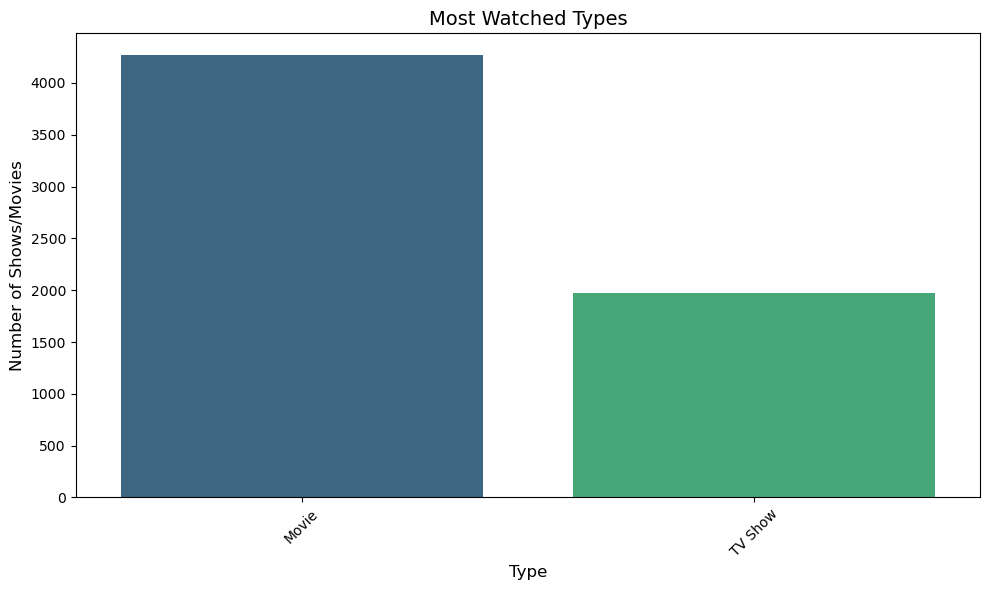

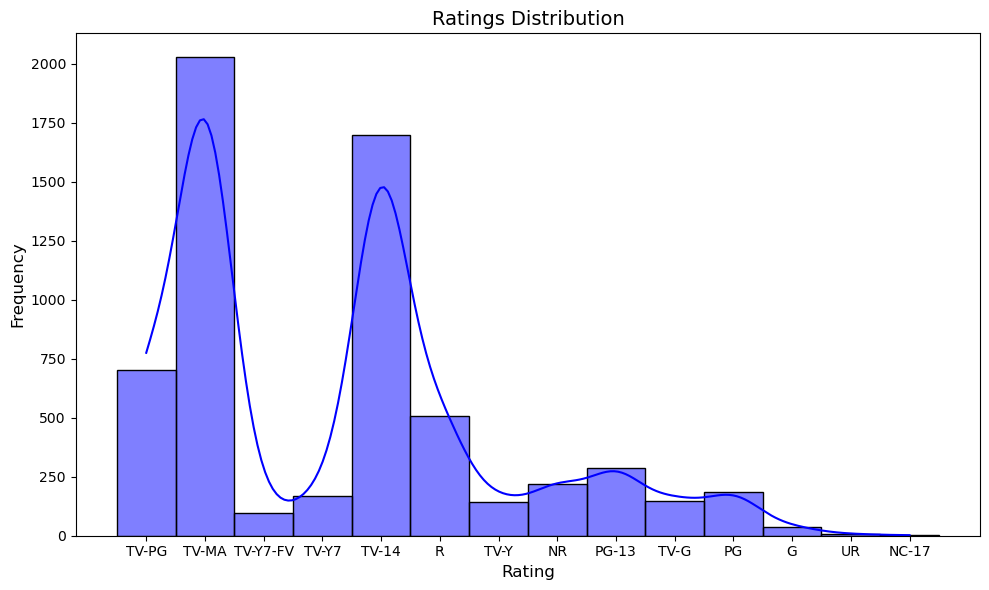

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r'C:\Users\lenovo\Desktop\Desktop\Nexford\BAN6420\Mod 4 Data visualization in R and Python\netflix_data.csv')

# Ensure the 'type' column exists and split comma-separated values
if 'type' in data.columns:
    data['type'] = data['type'].str.split(',')  # Split comma-separated types
    genres = data['type'].explode().value_counts()  # Flatten and count occurrences

    # Plot Most Watched Types
    plt.figure(figsize=(10, 6))
    sns.barplot(x=genres.index, y=genres.values, palette='viridis')
    plt.title('Most Watched Types', fontsize=14)
    plt.xlabel('Type', fontsize=12)
    plt.ylabel('Number of Shows/Movies', fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'type' not found in the dataset.")

# Analyze Ratings Distribution
if 'rating' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x='rating', kde=True, color='blue', bins=20)
    plt.title('Ratings Distribution', fontsize=14)
    plt.xlabel('Rating', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.tight_layout()
    plt.show()
else:
    print("Column 'rating' not found in the dataset.")

In [ ]:
Question 5.	R Integration: Implement one of the charts or visualizations in R.


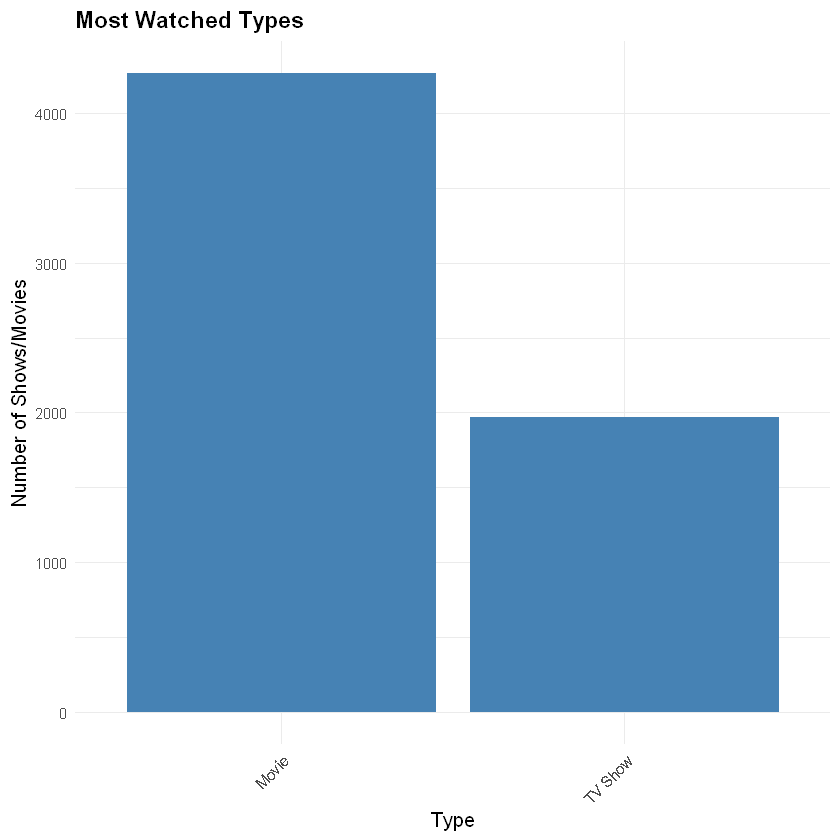

In [19]:
# Load required libraries
library(ggplot2)
library(dplyr)
library(tidyr)

# Load the dataset
data <- read.csv("C:/Users/lenovo/Desktop/Desktop/Nexford/BAN6420/Mod 4 Data visualization in R and Python/netflix_data.csv")

# Ensure the 'type' column exists and split comma-separated values
if ("type" %in% colnames(data)) {
  # Process 'type' column to count occurrences
  genres <- data %>%
    mutate(type = strsplit(as.character(type), ",")) %>%  # Split comma-separated values
    unnest(type) %>%                                      # Flatten the list
    count(type, name = "Frequency")                       # Count occurrences of each type

  # Plot Most Watched Types
  ggplot(genres, aes(x = reorder(type, -Frequency), y = Frequency)) +
    geom_bar(stat = "identity", fill = "steelblue") +
    theme_minimal() +
    labs(
      title = "Most Watched Types",
      x = "Type",
      y = "Number of Shows/Movies"
    ) +
    theme(
      axis.text.x = element_text(angle = 45, hjust = 1),
      plot.title = element_text(size = 14, face = "bold"),
      axis.title = element_text(size = 12)
    )
} else {
  message("Column 'type' not found in the dataset.")
}
